# Explorações no tempo

**Objetivo do projeto**: Utilizar a abordagem de "hierarchical forecasting" para projetar múltiplas séries temporais

## 0. Setup

In [1]:
%load_ext autotime

time: 118 µs (started: 2023-12-26 17:55:49 -03:00)


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px 

time: 427 ms (started: 2023-12-26 17:55:49 -03:00)


## 1. Dados: vendas de roupas no varejo

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-hierarchical-forecasting/main/retail-usa-clothing.csv')

dados.head()

,date,state,item,quantity,region,country
0,1997-11-25,NewYork,mens_clothing,8,Mid-Alantic,USA
1,1997-11-26,NewYork,mens_clothing,9,Mid-Alantic,USA
2,1997-11-27,NewYork,mens_clothing,11,Mid-Alantic,USA
3,1997-11-28,NewYork,mens_clothing,11,Mid-Alantic,USA
4,1997-11-29,NewYork,mens_clothing,10,Mid-Alantic,USA


time: 1.37 s (started: 2023-12-26 17:55:49 -03:00)


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388024 entries, 0 to 388023
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      388024 non-null  object
 1   state     388024 non-null  object
 2   item      388024 non-null  object
 3   quantity  388024 non-null  int64 
 4   region    388024 non-null  object
 5   country   388024 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.8+ MB
time: 56.8 ms (started: 2023-12-26 17:55:51 -03:00)


## 2. Correção nos dados

In [5]:
#---- Criando uma cópia dos dados

df = dados\
    .copy()

time: 11.3 ms (started: 2023-12-26 17:55:51 -03:00)


In [6]:
#---- Transformando para datetime a variável "date"

df['date'] = pd.to_datetime(df['date'])

df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 388024 entries, 0 to 388023
Series name: date
Non-Null Count   Dtype         
--------------   -----         
388024 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB
time: 71.4 ms (started: 2023-12-26 17:55:51 -03:00)


## 2. Análises 

### 2.1. Vendas por dia

- Pelo fato da série ter um período relativamente longo, com essa visão geral não conseguimos visualizar sazonalidade
- Mas existe uma tendência no aumento das vendas no varejo, perceptível a partir dos anos 2000

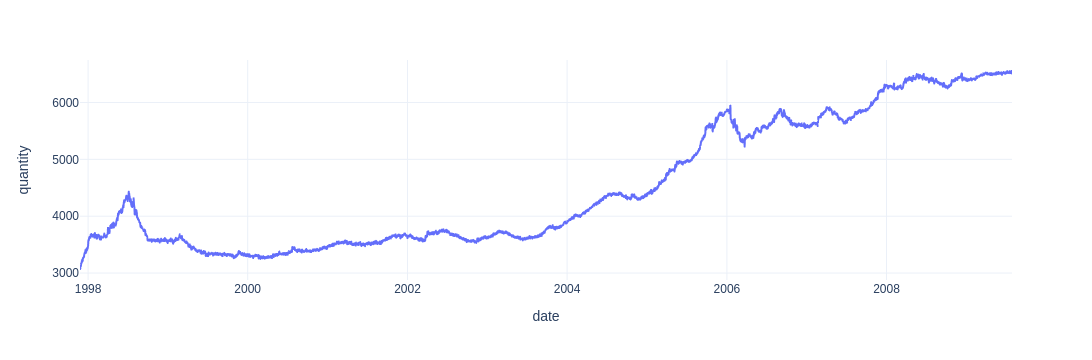

time: 154 ms (started: 2023-12-26 17:56:32 -03:00)


In [8]:
#---- Dataset:

df_vendas_dia = df\
    .groupby('date', as_index = False)['quantity']\
    .sum()

#---- Gráfico:

fig = px.line(df_vendas_dia, x = 'date', y = 'quantity', template = 'plotly_white')
fig.show()